In [1]:
from os import listdir
from os.path import isfile, join

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.style
import matplotlib as mpl
mpl.style.use('default')

In [2]:
AAAI_pal = {
    "Dark Blue": "#061B35",
    "Bright Blue": "#1240F5", 
    "Yellow":"#F0B546",
    "Light Blue": "#E1EEFE",
    "Main Blue": "#13396F"
}

box_pal = {
    "25%": AAAI_pal['Bright Blue'], 
    "50%": AAAI_pal['Yellow'],
    "75%": AAAI_pal['Main Blue']
}

In [3]:
# for i in ['cph', 'rsf', 'dcph', 'dcm', 'dsm', 'coxkan']:
#     for n in range(10):
#         print('python exp/test.py --data whas500 --model {} --seed {}'.format(i, n))

In [4]:
# for i in ['cph', 'rsf', 'dcph', 'dcm', 'dsm', 'coxkan']:
#     for n in range(10):
#         print('python exp/test.py --data pbc --model {} --seed {}'.format(i, n))

In [5]:
# for i in ['cph', 'rsf', 'dcph', 'dcm', 'dsm', 'coxkan']:
#     for n in range(10):
#         print('python exp/test.py --data colon --model {} --seed {}'.format(i, n))

In [6]:
# for i in ['cph', 'rsf', 'dcph', 'dcm', 'dsm', 'coxkan']:
#     for n in range(10):
#         print('python exp/test.py --data FRTCS --model {} --seed {}'.format(i, n))

In [7]:
res_files = [f for f in listdir('../results/') if isfile(join('../results/', f))]

In [8]:
df_summary = pd.DataFrame()

for i in res_files:
    if i.split('.')[-1] != 'txt' or i.split('_')[1] == 'symbol':
        continue
    res = pd.read_csv('../results/{}'.format(i), sep=":\t", header=None, engine='python')
    res.columns = ["info", "value"]
    res = res.set_index('info')
    
    if len(list(res.transpose().columns)) < 4:
        continue
    
    res_25 = res.transpose()[list(res.transpose().columns[:3]) + list(res.transpose().columns[4:7])]
    res_25.columns = list(res.transpose().columns[:3]) + ['C-Index', 'Brier Score', 'ROC AUC']
    res_25['Quantile'] = '25%'
    
    res_5 = res.transpose()[list(res.transpose().columns[:3]) + list(res.transpose().columns[8:11])]
    res_5.columns = list(res.transpose().columns[:3]) + ['C-Index', 'Brier Score', 'ROC AUC']
    res_5['Quantile'] = '50%'
    
    res_75 = res.transpose()[list(res.transpose().columns[:3]) + list(res.transpose().columns[12:])]
    res_75.columns = list(res.transpose().columns[:3]) + ['C-Index', 'Brier Score', 'ROC AUC']
    res_75['Quantile'] = '75%'
    
    df_summary = pd.concat([df_summary, res_25, res_5, res_75])
    
    # df_summary = pd.concat([df_summary, res.transpose()])

df_summary.reset_index(inplace=True, drop=True)
df_summary

,model,data,seed,C-Index,Brier Score,ROC AUC,Quantile
0,dcm,pbc,4,0.810262677236914,0.12782111299906004,0.8235415548490981,25%
1,dcm,pbc,4,0.7669595132349019,0.18672159290179582,0.807367032912532,50%
2,dcm,pbc,4,0.6150607912604628,0.26565097763932616,0.6270270423700037,75%
3,cph,FRTCS,4,0.8618171360687594,0.01444365449272579,0.8613138686131387,25%
4,cph,FRTCS,4,0.7472758343411311,0.03464713055990946,0.7476802935114479,50%
...,...,...,...,...,...,...,...
619,dcm,pbc,9,0.7343007637523932,0.1372730371951428,0.7395403958331636,50%
620,dcm,pbc,9,0.6438958615366994,0.19395285267260115,0.6364050159453746,75%
621,coxkan,FRTCS,5,0.9018181818181819,0.015689898116783674,0.9044117647058822,25%
622,coxkan,FRTCS,5,0.8874076989916551,0.033503289935708905,0.8491624934742332,50%


In [9]:
for i in df_summary.columns[3:-1]:
    df_summary[i] = df_summary[i].astype('float')
    
df_summary['model'] = df_summary['model'].str.upper()
df_summary['model'] = df_summary['model'].str.replace('COXKAN', 'CoxKAN')

df_summary

,model,data,seed,C-Index,Brier Score,ROC AUC,Quantile
0,DCM,pbc,4,0.810263,0.127821,0.823542,25%
1,DCM,pbc,4,0.766960,0.186722,0.807367,50%
2,DCM,pbc,4,0.615061,0.265651,0.627027,75%
3,CPH,FRTCS,4,0.861817,0.014444,0.861314,25%
4,CPH,FRTCS,4,0.747276,0.034647,0.747680,50%
...,...,...,...,...,...,...,...
619,DCM,pbc,9,0.734301,0.137273,0.739540,50%
620,DCM,pbc,9,0.643896,0.193953,0.636405,75%
621,CoxKAN,FRTCS,5,0.901818,0.015690,0.904412,25%
622,CoxKAN,FRTCS,5,0.887408,0.033503,0.849162,50%


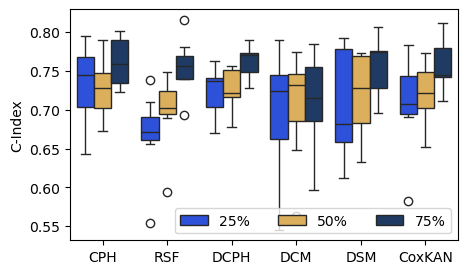

In [20]:
_ = plt.figure(figsize=(5,3))
sns.boxplot(df_summary.loc[df_summary.data=='whas500'], x='model', y='C-Index', hue='Quantile', 
            order=['CPH', 'RSF', 'DCPH', 'DCM', 'DSM', 'CoxKAN'], palette=box_pal)
plt.xlabel(None)
plt.legend(loc="lower right", ncol=3)
plt.show()

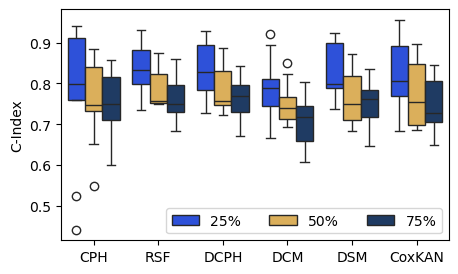

In [21]:
_ = plt.figure(figsize=(5,3))
sns.boxplot(df_summary.loc[df_summary.data=='pbc'], x='model', y='C-Index', hue='Quantile', 
            order=['CPH', 'RSF', 'DCPH', 'DCM', 'DSM', 'CoxKAN'], palette=box_pal)
plt.xlabel(None)
plt.legend(loc="lower right", ncol=3)
plt.show()

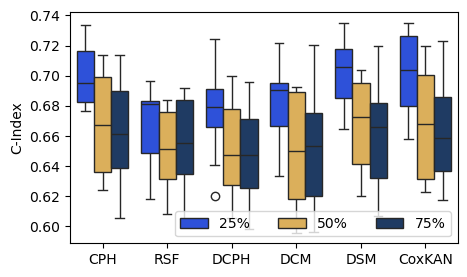

In [22]:
_ = plt.figure(figsize=(5,3))
sns.boxplot(df_summary.loc[df_summary.data=='colon'], x='model', y='C-Index', hue='Quantile', 
            order=['CPH', 'RSF', 'DCPH', 'DCM', 'DSM', 'CoxKAN'], palette=box_pal)
plt.xlabel(None)
plt.legend(loc="lower right", ncol=3)
plt.show()

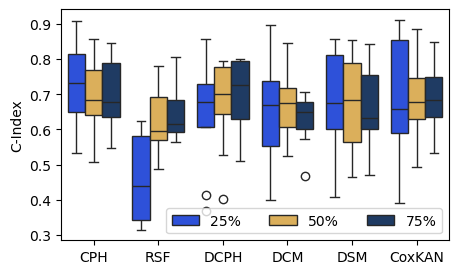

In [23]:
_ = plt.figure(figsize=(5,3))
sns.boxplot(df_summary.loc[df_summary.data=='FRTCS'], x='model', y='C-Index', hue='Quantile', 
            order=['CPH', 'RSF', 'DCPH', 'DCM', 'DSM', 'CoxKAN'], palette=box_pal)
plt.xlabel(None)
plt.legend(loc="lower right", ncol=3)
plt.show()